# Exploracion

##### Integrantes: 
##### - Harold Aquino Curisinche 
##### - Rosa Estrada Estrada
##### Descripción: Exploración inicial de los datos de reclamos de SUSALUD (2021-2024)

### Importacion de Librerias

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Estilos de graficos

In [11]:
sns.set_style(style="whitegrid")

## Cargar datos procesados

In [13]:
df = pd.read_csv("../data/processed/reclamos_descripcionesv2.csv", low_memory=False)

In [14]:
df.head()

,ID_PERIODO,DE_TIPO_ADMINISTRADO,CO_ADMIN_DECLA,CO_UGIPRESS,DE_TIPO_INSTITUCION,CO_ADMIN_SUCE,DE_MEDIO_PRESENTACION,CO_UNICO_RECLAMO,DE_MEDIO_RECEPCION,FE_PRESEN_RECLA,...,DE_TIPO_ADMIN_DERIVA,CO_ADMIN_DERIVA,DE_RESULTADO,DE_MOTIVO_CONCL_ANTIC,FE_RESULT_RECL,DE_COMUN_RESULT,FE_NOTIFI_RESULT,AÑO,MES,DESCRIPCION
0,202101,IAFAS,20007,20007,IAFAS,20007,Físico,20007-352,Libro de Reclamaciones Físico,2020-11-27,...,-,-,Infundado,-,2020-12-21,Correo electrónico,NaN,2020,11,-
1,202101,IAFAS,20007,20007,IAFAS,20007,Físico,20007-360,Libro de Reclamaciones Físico,2021-01-04,...,-,-,Infundado,-,2021-02-18,Correo electrónico,NaN,2021,1,Me cobraron por una vacuna que estaba incluida...
2,202101,IAFAS,20007,20007,IAFAS,20007,Físico,20007-361,Libro de Reclamaciones Físico,2021-01-06,...,-,-,Infundado,-,2021-01-20,Correo electrónico,20210122.0,2021,1,Las ambulancias de EsSalud no llegaron a tiemp...
3,202101,IAFAS,20007,20007,IAFAS,20007,Físico,20007-364,Libro de Reclamaciones Físico,2021-01-06,...,-,-,Infundado,-,2021-01-25,Correo electrónico,20210204.0,2021,1,La atención que brindan las IAFAS no ha sido d...
4,202101,IAFAS,20007,20007,IAFAS,20007,Físico,20007-365,Libro de Reclamaciones Físico,2021-01-08,...,-,-,Pendiente,-,NaN,-,NaN,2021,1,He tenido problemas para acceder a mis servici...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162639 entries, 0 to 162638
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID_PERIODO             162639 non-null  int64 
 1   DE_TIPO_ADMINISTRADO   162639 non-null  object
 2   CO_ADMIN_DECLA         162639 non-null  int64 
 3   CO_UGIPRESS            162639 non-null  int64 
 4   DE_TIPO_INSTITUCION    162639 non-null  object
 5   CO_ADMIN_SUCE          162639 non-null  int64 
 6   DE_MEDIO_PRESENTACION  162639 non-null  object
 7   CO_UNICO_RECLAMO       162639 non-null  object
 8   DE_MEDIO_RECEPCION     162639 non-null  object
 9   FE_PRESEN_RECLA        162639 non-null  object
 10  DE_SERVICIO            162639 non-null  object
 11  DE_COMPETENCIA         162639 non-null  object
 12  DE_CLASIF_1            162639 non-null  object
 13  DE_CLASIF_2            162639 non-null  object
 14  DE_CLASIF_3            162639 non-null  object
 15  

In [16]:
df.describe()

,ID_PERIODO,CO_ADMIN_DECLA,CO_UGIPRESS,CO_ADMIN_SUCE,AÑO,MES
count,162639.000000,162639.000000,162639.000000,1.626390e+05,162639.000000,162639.000000
mean,202259.912702,13605.485917,13605.485917,8.740303e+04,2022.058061,6.330173
std,96.781974,4820.730579,4820.730579,8.550039e+05,1.005160,3.476604
min,202101.000000,10001.000000,10001.000000,1.000000e+00,2011.000000,1.000000
25%,202204.000000,10001.000000,10001.000000,1.000100e+04,2021.000000,3.000000
50%,202301.000000,10002.000000,10002.000000,1.000200e+04,2022.000000,6.000000
75%,202310.000000,20004.000000,20004.000000,2.000500e+04,2023.000000,9.000000
max,202406.000000,50025.000000,50025.000000,1.000014e+07,2024.000000,12.000000


## Valores nulos o que contenga "-" por columna

In [18]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0] 

FE_RESULT_RECL       97422
FE_NOTIFI_RESULT    104740
dtype: int64

In [19]:
dash_counts = (df == "-").sum()
dash_counts[dash_counts > 0]

DE_SERVICIO              133478
DE_CLASIF_1               63269
DE_CLASIF_2              157363
DE_CLASIF_3              157927
CO_RECLAMO_PRIMIG        154547
DE_ETAPA_RECLAMO          19966
DE_TIPO_ADMIN_DERIVA     130227
CO_ADMIN_DERIVA          130227
DE_RESULTADO               3242
DE_MOTIVO_CONCL_ANTIC    161014
DE_COMUN_RESULT           41352
DESCRIPCION               35200
dtype: int64

## Conteo de registros por año

#### Conversion de la columna id periodo a string y obtención del año

In [22]:
df["ID_PERIODO"] = df["ID_PERIODO"].astype(str)
df["AÑO"] = df["ID_PERIODO"].str[:4]

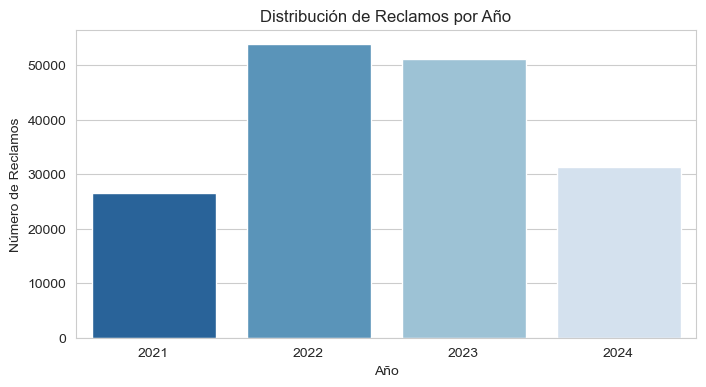

In [23]:
reclamos_por_año = df["AÑO"].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(
    x=reclamos_por_año.index, 
    y=reclamos_por_año.values,
    hue=reclamos_por_año.index,
    legend=False, 
    palette="Blues_r")
plt.xlabel("Año")
plt.ylabel("Número de Reclamos")
plt.title("Distribución de Reclamos por Año")
plt.show()

## Distribución de reclamos por medio de presentación

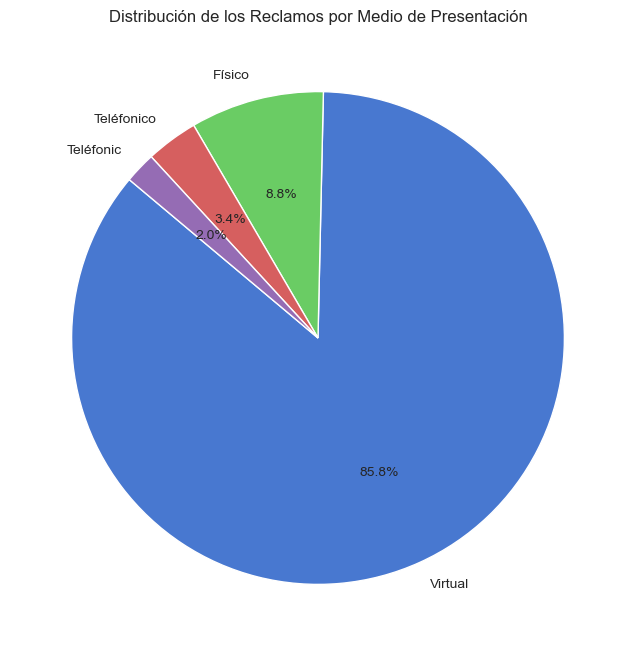

In [25]:
medio_counts = df["DE_MEDIO_PRESENTACION"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    medio_counts, 
    labels=medio_counts.index, 
    autopct="%1.1f%%", 
    startangle=140, 
    colors=sns.color_palette("muted6"))
plt.title("Distribución de los Reclamos por Medio de Presentación")
plt.show()

## Conteo de reclamos por estado

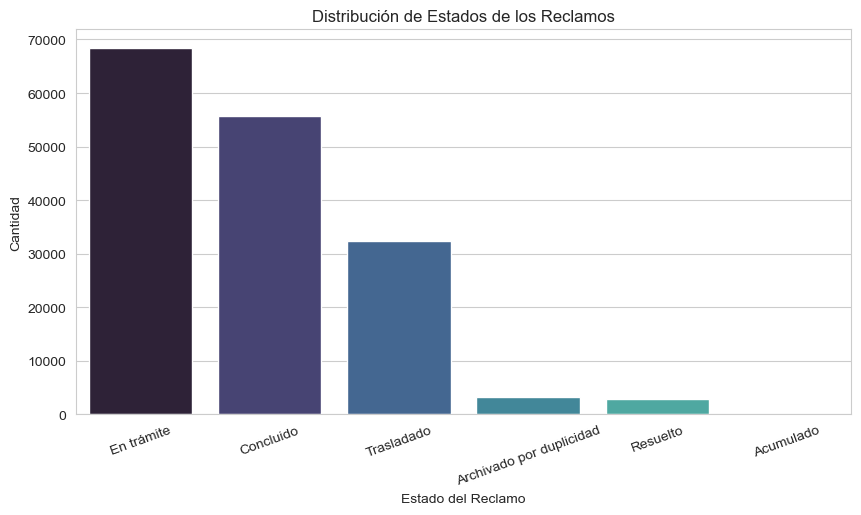

In [27]:
estado_counts = df["DE_ESTADO_RECLAMO"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(
    x=estado_counts.index, 
    y=estado_counts.values, 
    hue=estado_counts.index,
    legend=False,
    palette="mako")
plt.xticks(rotation=20, ha="center")
plt.xlabel("Estado del Reclamo")
plt.ylabel("Cantidad")
plt.title("Distribución de Estados de los Reclamos")
plt.show()

In [28]:
df["DE_ESTADO_RECLAMO"].unique()

array(['Resuelto', 'Concluido', 'En trámite', 'Trasladado', 'Acumulado',
       'Archivado por duplicidad'], dtype=object)

## Reclamos en tramite por año

In [30]:
reclamos_tramite = df[df["DE_ESTADO_RECLAMO"] == "En trámite"]

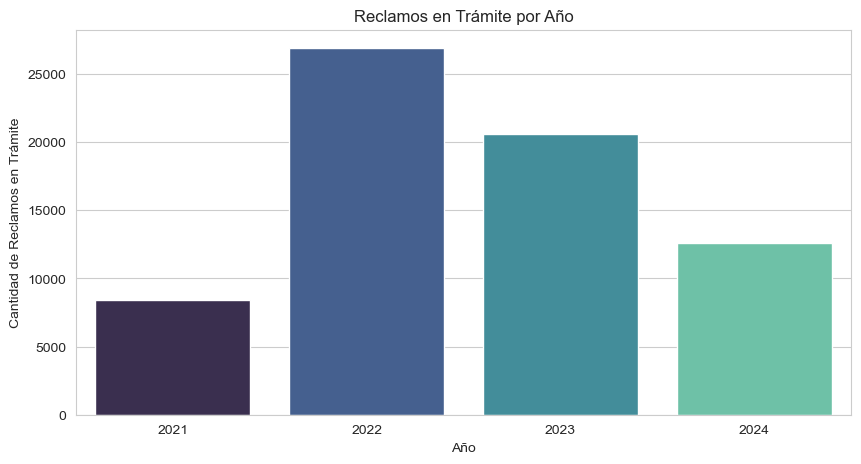

In [31]:
tramite_por_año = reclamos_tramite["AÑO"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    x=tramite_por_año.index,
    y=tramite_por_año.values,
    hue=tramite_por_año.index,
    legend=False,
    palette="mako"
)
plt.xticks(rotation=0)
plt.xlabel("Año")
plt.ylabel("Cantidad de Reclamos en Trámite")
plt.title("Reclamos en Trámite por Año")
plt.show()